In [1]:
from utils import *
plt.style.use('seaborn-white')

In [2]:
input_dir = '../results/analysis/minisas/'

In [3]:
os.listdir('../results/analysis/minisas/LN/CALI2/gains/')

['gains_femb111_900mVBL_14_0mVfC_2_0us_DAC_peakmax_.png',
 'gains_femb102_900mVBL_14_0mVfC_2_0us.csv',
 'gains_femb112_900mVBL_14_0mVfC_2_0us_DAC_peakmax_.png',
 'gains_femb110_900mVBL_14_0mVfC_2_0us.png',
 'gains_femb108_900mVBL_14_0mVfC_2_0us.png',
 'gains_femb101_900mVBL_14_0mVfC_2_0us.png',
 'gains_femb110_900mVBL_14_0mVfC_2_0us.csv',
 'gains_femb102_900mVBL_14_0mVfC_2_0us.png',
 'gains_femb108_900mVBL_14_0mVfC_2_0us_DAC_peakmax_.png',
 'gains_femb107_900mVBL_14_0mVfC_2_0us.png',
 'gains_femb112_900mVBL_14_0mVfC_2_0us.csv',
 'gains_femb106_900mVBL_14_0mVfC_2_0us_DAC_peakmax_.png',
 'gains_femb105_900mVBL_14_0mVfC_2_0us_DAC_peakmax_.png',
 'gains_femb114_900mVBL_14_0mVfC_2_0us_DAC_peakmax_.png',
 'gains_femb106_900mVBL_14_0mVfC_2_0us.png',
 'gains_femb111_900mVBL_14_0mVfC_2_0us.csv',
 'gains_femb101_900mVBL_14_0mVfC_2_0us_DAC_peakmax_.png',
 'gains_femb75_900mVBL_14_0mVfC_2_0us_DAC_peakmax_.png',
 'gains_femb106_900mVBL_14_0mVfC_2_0us.csv',
 'gains_femb108_900mVBL_14_0mVfC_2_0us.csv

200mVBL_14_0mVfC_2_0us
['113', '105', '115', '114', '107', '110', '109', '112', '106', '104', '108', '102', '103', '101']
200mVBL_4_7mVfC_2_0us
['108', '106', '109', '101', '107', '115', '112', '114', '104', '105', '113', '102', '103', '110']
200mVBL_7_8mVfC_2_0us
['101', '113', '114', '106', '103', '105', '108', '115', '112', '110', '104', '107', '109', '102']
200mVBL_25_0mVfC_2_0us
['104', '112', '108', '107', '102', '106', '114', '105', '103', '101', '110', '115', '109', '113']
200mVBL_14_0mVfC_2_0us
['113', '105', '115', '114', '107', '110', '109', '112', '106', '104', '108', '102', '103', '101']
200mVBL_4_7mVfC_2_0us
['108', '106', '109', '101', '107', '115', '112', '114', '104', '105', '113', '102', '103', '110']
200mVBL_7_8mVfC_2_0us
['101', '113', '114', '106', '103', '105', '108', '115', '112', '110', '104', '107', '109', '102']
200mVBL_25_0mVfC_2_0us
['104', '112', '108', '107', '102', '106', '114', '105', '103', '101', '110', '115', '109', '113']
900mVBL_14_0mVfC_2_0us
['102

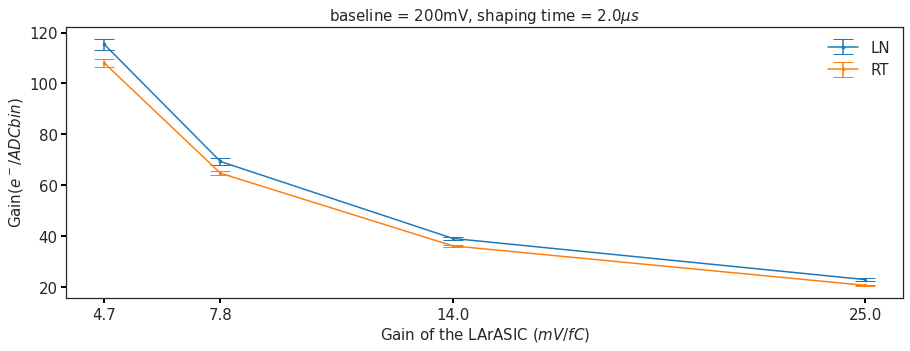

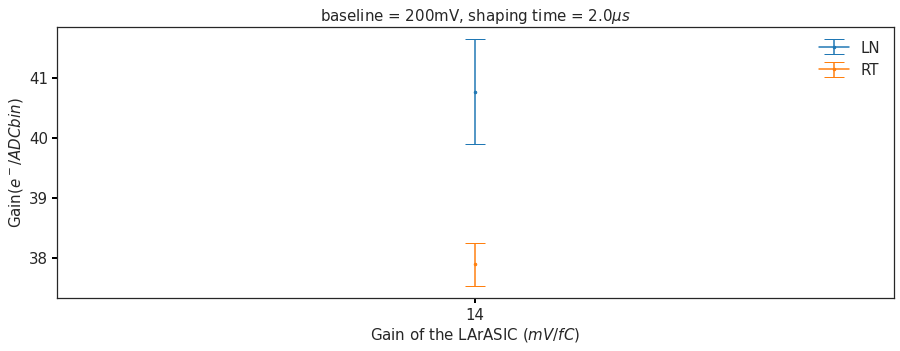

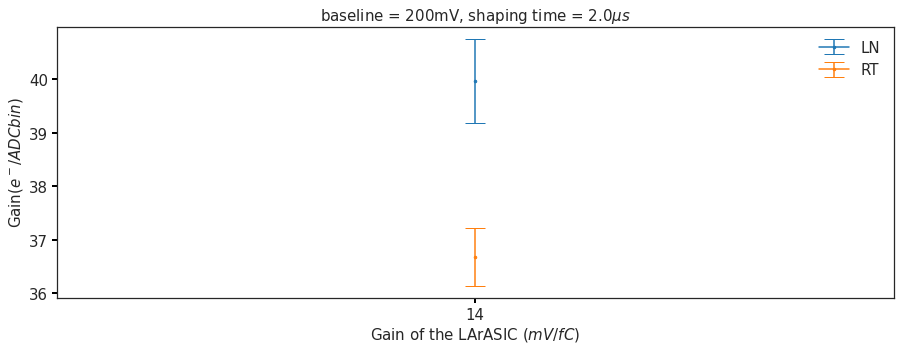

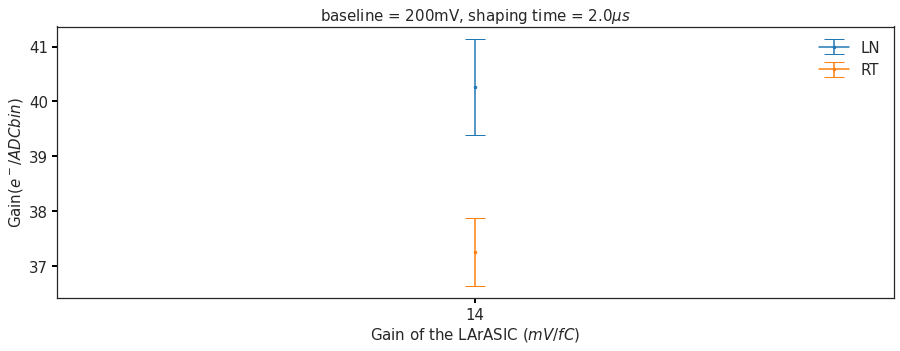

In [5]:
# gains
temperatures = ['LN', 'RT']
# cali_numbers = ['CALI1', 'CALI2', 'CALI3', 'CALI4']
cali_numbers = ['CALI1', 'CALI2', 'CALI3', 'CALI4']

# for T in temperatures:
#     for CALI in cali_numbers:
for CALI in cali_numbers:
    plt.figure(figsize=(15, 5))
    plt.style.use('seaborn-white')
    plt.tick_params(axis='x', direction='out', length=5, width=2, color='black', top=False)
    plt.tick_params(axis='y', direction='out', length=5, width=2, color='black', right=False)
    for T in temperatures:
        output_dir = '/'.join([input_dir, T, CALI, 'gains_vs_femb'])
        try:
            os.mkdir(output_dir)
        except:
            pass

        configs = []
        for f in os.listdir('/'.join([input_dir, T, CALI, 'gains'])):
            if ('.csv' in f) & ('gains' in f):
                config1 = f.split('_')[2]
                config2 = (f.split('mVBL_')[-1]).split('.')[0]
                configs.append('_'.join([config1, config2]))
        configs = pd.Series(configs)
        #----------------------
        mean_per_configs = []
        std_per_configs = []
        unique_configs = []
        for c in configs.unique():
            tmp_c = c.split('_')
            p1 = tmp_c[1]
            p2 = tmp_c[2].split('m')[0]
            unique_configs.append(float('.'.join([p1, p2])))
            
        #----------------------
        for config in configs.unique():
            femb_ids = []
#             mean_gains = []
            gains = []
            sgp1 = False
            print(config)
            for f in os.listdir('/'.join([input_dir, T, CALI, 'gains'])):
                if ('.csv' in f) & ('gains' in f) & (config in f):
#                     config = (f.split('mVBL_')[-1]).split('.')[0]
                    femb_id = f.split('_')[1]
                    if femb_id != 'femb111': # failed board
                        if 'sgp1' in f:
                            sgp1 = True
                        if femb_id == 'femb75':
                            continue
                        femb_id = str(femb_id.split('b')[-1])
                        femb_ids.append(femb_id)
                        df = pd.read_csv('/'.join([input_dir, T, CALI, 'gains', f]))
                        gains += list(df['Gain'])
            print(femb_ids)
            mean_per_configs.append(np.mean(gains))
            std_per_configs.append(np.std(gains))
        df_mean = pd.DataFrame({'gain_larasic': unique_configs, 'mean_gain': mean_per_configs, 'std': std_per_configs})
        df_mean = df_mean.sort_values(by='gain_larasic', ascending=True)

        plt.errorbar(x=df_mean['gain_larasic'], y=df_mean['mean_gain'], yerr=df_mean['std'], marker='.',
                     capsize=10, markersize=5, label=T)
        plt.xticks(df_mean['gain_larasic'], fontsize=15)
        plt.yticks(fontsize=15)
    plt.xlabel('Gain of the LArASIC ($mV/fC$)', fontsize=15)
    plt.ylabel('Gain($e^-/ADC bin$)', fontsize=15)
    plt.legend(fontsize=15)
    plt.title('baseline = 200mV, shaping time = 2.0$\mu s$', fontsize=15)
    plt.savefig('/'.join([input_dir, 'gain_vs_gainLArASIC_{}.png'.format(CALI)]))
#     plt.show()
                    
                    
#                     mean_gain = np.mean(df['Gain'])
#                     mean_gains.append(mean_gain)
#             MEAN = np.mean(mean_gains)
#             STD = np.std(mean_gains)
#             plt.figure(figsize=(15, 5))
#             plt.plot(femb_ids, mean_gains, marker='.', markersize=7.5, label='mean = {:.3f}__std = {:.3f}'.format(MEAN, STD))
#             plt.xlabel('FEMB')
#             plt.ylabel('mean_gain ($e^-$/ADC bin)')
#             plt.title('{}, mean gain vs FEMB, config: {}'.format(CALI, config))
#             plt.legend()
#             figname = '_'.join([CALI, config, 'gain_vs_femb'])
#             if sgp1:
#                 figname += '_sgp1'
#             plt.savefig('/'.join([output_dir, figname + '.png']))

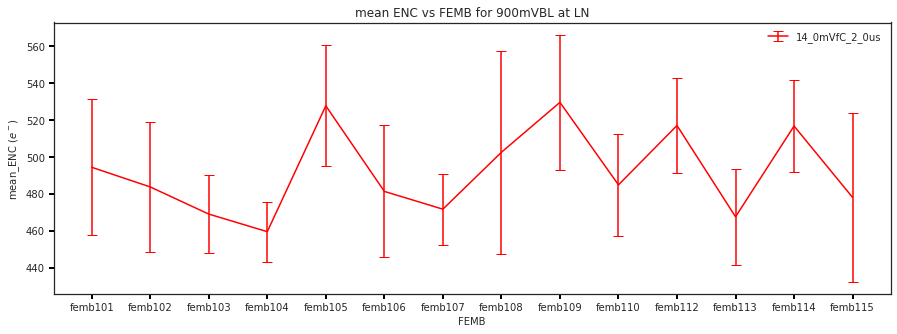

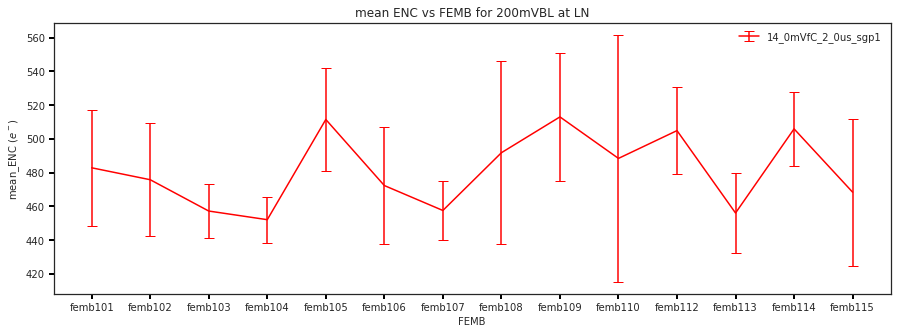

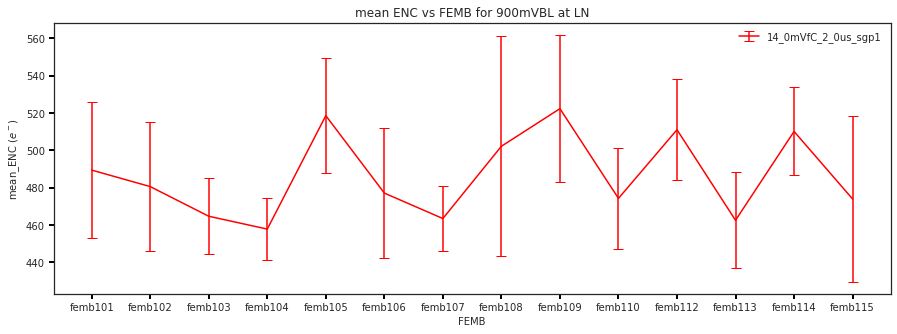

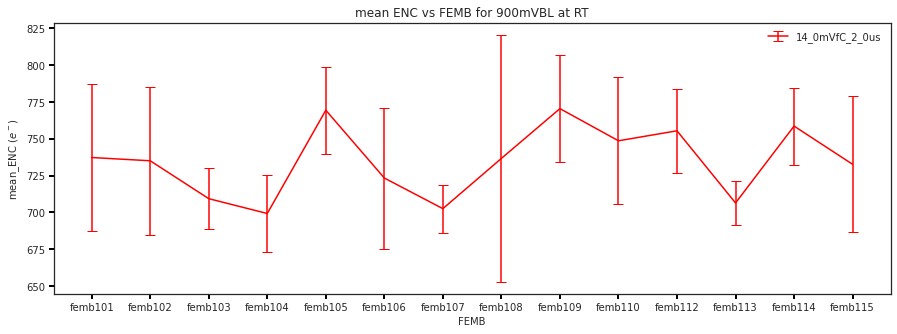

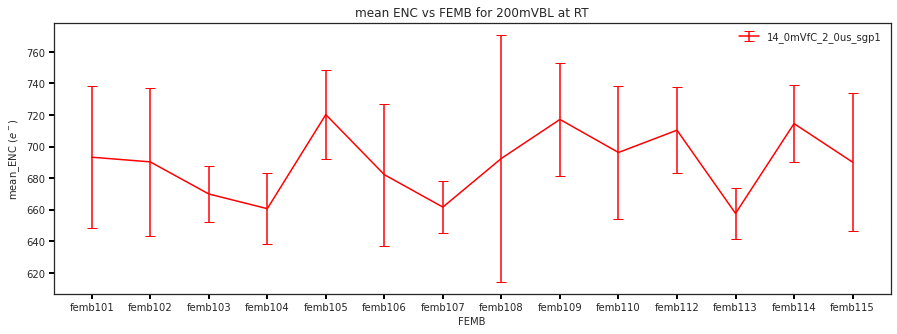

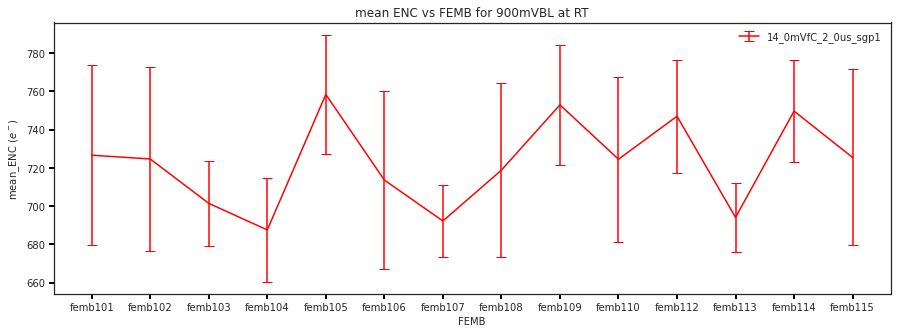

In [6]:
# enc
temperatures = ['LN', 'RT']
# cali_numbers = ['CALI2']#, 'CALI2', 'CALI3', 'CALI4']
cali_numbers = ['CALI2', 'CALI3', 'CALI4']
for T in temperatures:
    for CALI in cali_numbers:
        output_dir = '/'.join([input_dir, T, CALI, 'enc_vs_femb'])
        try:
            os.mkdir(output_dir)
        except:
            pass

        configs = []
        for f in os.listdir('/'.join([input_dir, T, CALI, 'ENC'])):
            if ('.csv' in f):
#                 config = (f.split('mVBL_')[-1]).split('.')[0]
#                 configs.append(config)
                config1 = f.split('_')[1]
                config2 = (f.split('mVBL_')[-1]).split('.')[0]
                configs.append('_'.join([config1, config2]))
        configs = pd.Series(configs)
        #
        plt.figure(figsize=(15, 5))
        plt.style.use('seaborn-white')
        plt.tick_params(axis='x', direction='out', length=5, width=2, color='black', top=False)
        plt.tick_params(axis='y', direction='out', length=5, width=2, color='black', right=False)
        colors = ['red', 'green', 'blue', 'orange']
        #
        gain_df = pd.DataFrame()
        for i, config in enumerate(configs.unique()):
            femb_ids = []
            mean_encs = []
            std_encs = []
            sgp1 = False
            for f in os.listdir('/'.join([input_dir, T, CALI, 'ENC'])):
                if ('.csv' in f) & (config in f):
#                     config = (f.split('mVBL_')[-1]).split('.')[0]
                    femb_id = f.split('_')[0]
                    if 'sgp1' in f:
                        sgp1 = True
                    if femb_id == 'femb75':
                        continue
#                     femb_id = str(femb_id.split('b')[-1])
                    femb_ids.append(femb_id)
                    df = pd.read_csv('/'.join([input_dir, T, CALI, 'ENC', f]))
                    mean_enc = np.mean(df['ENC'])
                    mean_encs.append(mean_enc)
                    std_encs.append(np.std(df['ENC']))
            #
            tmp_df = pd.DataFrame({'femb': femb_ids, 'enc_{}'.format(config): mean_encs, 'std_{}'.format(config): std_encs})
            if i==0:
                gain_df = pd.concat([gain_df, tmp_df], axis=1)
            else:
                gain_df = gain_df.merge(tmp_df, how='left', on='femb')
#             plt.figure(figsize=(15, 5))
#             plt.plot(femb_ids, mean_gains, marker='.', markersize=7.5, color=colors[i],
#                      label='{}__mean = {:.3f}__std = {:.3f}'.format(config, MEAN, STD))
        cols = gain_df.columns
        BL = cols[1].split('_')[1]

        i = 0
        for ii in range(1, len(cols), 2):
            config = '_'.join(cols[ii].split('_')[2:])
            coly = cols[ii]
            colerr = cols[ii+1]
            gain_df.sort_values(by='femb', ascending=True, inplace=True)
            plt.errorbar(x=gain_df['femb'], y=gain_df[coly], yerr=gain_df[colerr], color=colors[i],
                        capsize=5, label='{}'.format(config))
            i += 1
        plt.xlabel('FEMB')
        plt.ylabel('mean_ENC ($e^-$)')
        plt.title('mean ENC vs FEMB for {} at {}'.format(BL, T))
#         plt.title('{}, mean ENC vs FEMB for {} at {}'.format(CALI, BL, T))
        plt.legend()
        figname = '_'.join([CALI, 'ENC_vs_femb'])
        if sgp1:
            figname += '_sgp1'
        plt.savefig('/'.join([output_dir, figname + '.png']))